## 로이터 데이터셋

1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


## 데이터 준비

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 벡터 변환
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

레이블을 벡터로 바꾸는 방법은 두 가지입니다. 
- 정수 텐서로 변환
- 원-핫 인코딩 사용
(레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터)

원-핫 인코딩이 범주형 데이터에 널리 사용 


In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 모델 구성

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu')) # 46개 클래스를 판단하기 위해 층을 64개
model.add(layers.Dense(46, activation='softmax')) # 46개 클래스에 속할 확률들

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', # 이 함수는 두 확률 분포의 사이의 거리를 측정
              metrics=['accuracy'])

## 훈련 검증

훈련 데이터에서 1,000개의 샘플을 따로 떼어서 검증 세트로 사용

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 155ms/step - loss: 2.4832 - accuracy: 0.5306 - val_loss: 1.6441 - val_accuracy: 0.6310
Epoch 2/20
16/16 [==============================] - 1s 89ms/step - loss: 1.3694 - accuracy: 0.6976 - val_loss: 1.2706 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 88ms/step - loss: 1.0313 - accuracy: 0.7777 - val_loss: 1.1326 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 1s 86ms/step - loss: 0.8146 - accuracy: 0.8254 - val_loss: 1.0455 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 1s 93ms/step - loss: 0.6501 - accuracy: 0.8576 - val_loss: 0.9789 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 92ms/step - loss: 0.5180 - accuracy: 0.8895 - val_loss: 0.9602 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 89ms/step - loss: 0.4145 - accuracy: 0.9103 - val_loss: 0.9247 - val_accuracy: 0.8120
Epoch 8/20
1

In [ ]:
import matplotlib.pyplot as plt

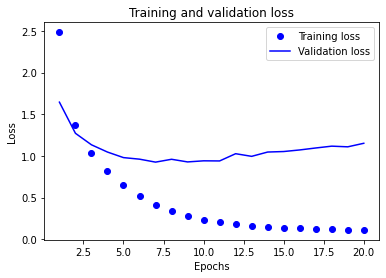

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

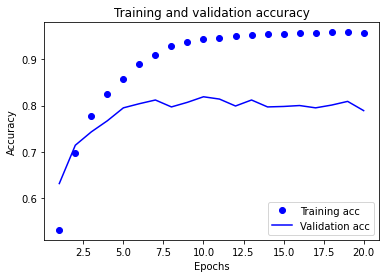

In [ ]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9, # 위에서 보고 9로 선택
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 58ms/step - loss: 2.7020 - accuracy: 0.4929 - val_loss: 1.8014 - val_accuracy: 0.6440
Epoch 2/9
16/16 [==============================] - 1s 60ms/step - loss: 1.4673 - accuracy: 0.7067 - val_loss: 1.3282 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 1s 51ms/step - loss: 1.0732 - accuracy: 0.7751 - val_loss: 1.1470 - val_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.8383 - accuracy: 0.8220 - val_loss: 1.0450 - val_accuracy: 0.7890
Epoch 5/9
16/16 [==============================] - 1s 48ms/step - loss: 0.6721 - accuracy: 0.8554 - val_loss: 0.9562 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5357 - accuracy: 0.8881 - val_loss: 0.9209 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 1s 46ms/step - loss: 0.4304 - accuracy: 0.9109 - val_loss: 0.8862 - val_accuracy: 0.8160
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9898437261581421, 0.7822796106338501]

In [ ]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

4

## 레이블과 손실을 다루는 다른 방법

앞서 언급한 것처럼 레이블을 인코딩하는 다른 방법은 다음과 같이 정수 텐서로 변환하는 것입니다:

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

이 방식을 사용하려면 손실 함수 하나만 바꾸면 됩니다. 코드 3-21에 사용된 손실 함수 `categorical_crossentropy`는 레이블이 범주형 인코딩되어 있을 것이라고 기대합니다. 정수 레이블을 사용할 때는 `sparse_categorical_crossentropy`를 사용해야 합니다:

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

이 손실 함수는 인터페이스만 다를 뿐이고 수학적으로는 `categorical_crossentropy`와 동일합니다.

## 충분히 큰 중간층을 두어야 하는 이유

앞서 언급한 것처럼 마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개보다 많이 적어서는 안 됩니다. 46차원보다 훨씬 작은 중간층(예를 들면 4차원)을 두면 정보의 병목이 어떻게 나타나는지 확인해 보겠습니다.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 3.0935 - accuracy: 0.2170 - val_loss: 2.3549 - val_accuracy: 0.4200
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 1.9000 - accuracy: 0.5563 - val_loss: 1.6991 - val_accuracy: 0.5760
Epoch 3/20
63/63 [==============================] - 1s 17ms/step - loss: 1.4962 - accuracy: 0.5853 - val_loss: 1.5648 - val_accuracy: 0.5750
Epoch 4/20
63/63 [==============================] - 1s 17ms/step - loss: 1.3244 - accuracy: 0.6283 - val_loss: 1.5018 - val_accuracy: 0.6510
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.2013 - accuracy: 0.7011 - val_loss: 1.4734 - val_accuracy: 0.6490
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 1.1133 - accuracy: 0.7194 - val_loss: 1.4624 - val_accuracy: 0.6700
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0427 - accuracy: 0.7294 - val_loss: 1.4811 - val_accuracy: 0.6730
Epoch 8/20
63

검증 정확도의 최고 값은 약 71%로 8% 정도 감소되었습니다. 이런 손실의 대부분 원인은 많은 정보(46개 클래스의 분할 초평면을 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문입니다. 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했습니다.

[과제] 유닛수를 32개, 128개로 조정하고 한개의 은닉층을 세 개의 은닉층으로 변경하여 학습 및 평가 수행한 후 그 차이를 논하세요.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=256,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
32/32 [==============================] - 3s 60ms/step - loss: 2.0557 - accuracy: 0.5575 - val_loss: 1.4177 - val_accuracy: 0.6900
Epoch 2/8
32/32 [==============================] - 2s 47ms/step - loss: 1.0853 - accuracy: 0.7518 - val_loss: 1.0819 - val_accuracy: 0.7740
Epoch 3/8
32/32 [==============================] - 2s 71ms/step - loss: 0.7413 - accuracy: 0.8284 - val_loss: 1.0488 - val_accuracy: 0.7580
Epoch 4/8
32/32 [==============================] - 2s 63ms/step - loss: 0.5232 - accuracy: 0.8782 - val_loss: 1.0623 - val_accuracy: 0.7700
Epoch 5/8
32/32 [==============================] - 2s 77ms/step - loss: 0.3603 - accuracy: 0.9164 - val_loss: 0.9721 - val_accuracy: 0.8060
Epoch 6/8
32/32 [==============================] - 2s 53ms/step - loss: 0.2807 - accuracy: 0.9359 - val_loss: 1.1114 - val_accuracy: 0.7800
Epoch 7/8
32/32 [==============================] - 2s 57ms/step - loss: 0.2122 - accuracy: 0.9461 - val_loss: 1.1013 - val_accuracy: 0.7890
Epoch 8/8
71/71 [===

층을 무작정 많이 추가하는 것이 수행 시간만 늘고 성능 개선에 도움이 되지는 않을 수 있다.